# Home Work 5 (70)
## (APANPS5335 Machine Learning)

## Submitted by: Eli Guo
## UNI: yg2869
### Posted: 10/31/2023 | Due: 11/20/2023 by 11:59 pm


Please kindly submit your well-organized PDF and notebook to Gradescope, ensuring they align with each question or task. 

Please minimize any extraneous output in your Jupyter notebooks or PDFs. This aids graders in evaluating your work effectively.

# Question 1 (15 points)

Conceptual questions. Please provide your answer in writing. Explain clearly and provide justifications.

# 1.1 (5 points)

What is the benefit of out of bag evaluation?

__Answer__

Out of bag (OOB) evaluation is a unique and valuable method in the context of ensemble learning, particularly in random forest algorithms. This approach provides an efficient way to estimate the model's performance without the need for a separate validation or cross-validation dataset. In ensemble methods like random forests, each decision tree is built from a bootstrap sample, that is, a sample drawn with replacement from the training dataset. Notably, not all instances from the training set are used in the creation of each tree. Typically, about one-third of the data points are left out of the bootstrap sample and not used in constructing a particular tree. These left-out data points are referred to as out of bag data.

The key advantage of OOB evaluation lies in its efficiency and simplicity. Since each tree in the forest is constructed using different subsets of the training data, the OOB instances can serve as a test set for that tree. By aggregating the OOB predictions from each tree, we can obtain an overall OOB error estimate for the entire model. This process is done internally during the training of the model, eliminating the need for a separate validation step or the complexities of cross-validation procedures. This is particularly beneficial in scenarios where data is scarce, as it allows the entire dataset to be used for training while still providing a robust estimate of model performance.

Furthermore, OOB evaluation offers a more unbiased estimate of model performance compared to traditional methods like train-test split, especially in cases where the data is limited or has a skewed distribution. Since each tree is evaluated on different subsets of OOB data, the model's ability to generalize to unseen data is more accurately gauged. This approach also helps in identifying overfitting. If a model performs well on the training data but poorly on the OOB data, it may be an indication that the model is overfitting to the training data.

In summary, out of bag evaluation in ensemble methods like random forests presents a practical and efficient way to assess model performance. Its ability to provide an unbiased estimate of the generalization error without the need for separate validation datasets makes it a valuable tool, particularly in situations where data availability is limited. By leveraging the natural variation in bootstrap sampling, OOB evaluation offers a unique and insightful approach to understanding model efficacy and robustness.

# 1.2 (5 points)

Supposed you have trained 3 different models on the exact same training data, and they all achieve the same precision, say $x\%$. Is it possible to combine these models to get better results? Justify your answer. Feel free to find resources available outside of your textbook but summarize in your own words.

__Answer__

Yes, it is possible to combine multiple models that have the same precision to achieve better results. This approach is known as ensemble learning, and it is based on the principle that a group of weak learners can come together to form a strong learner. Even if individual models have identical performance metrics, such as precision, they might be making different types of errors on different subsets of the data. By combining these models, we can often create a more robust and accurate predictive model.

One common technique for combining models is called model averaging, where predictions from each model are averaged to make the final prediction. This can be as simple as taking the arithmetic mean of the predictions. The idea here is that by averaging, the variance in the predictions is reduced, leading to more stable and accurate results. This approach is particularly effective when the models are uncorrelated or when they make independent errors.

Another popular method is voting, used especially in classification tasks. In majority voting, the class that gets the most votes from different models is chosen as the final prediction. In weighted voting, more weight is given to models based on their confidence or some other performance metric. This can be particularly effective if some models are consistently more reliable than others.

A more sophisticated approach is stacking, where the outputs of individual models become the inputs for a new model, often called a meta-learner. This meta-learner is trained to make the best use of the different predictions. The intuition is that the meta-learner can learn how to best combine the strengths of each individual model, while mitigating their weaknesses.

The key to the success of these ensemble methods lies in diversity. If all the models are making identical errors on the same data points, then combining them will not improve performance. However, if each model has its own unique strengths and weaknesses, their combination can lead to better overall performance. This diversity can be achieved through using different types of models, different training algorithms, or even different features or representations of the data.

In conclusion, combining multiple models with the same level of precision can indeed lead to better overall results. Techniques like model averaging, voting, and stacking leverage the diversity among models to create a more accurate and robust prediction. The key is that the errors made by individual models are not identical and can be compensated for by other models in the ensemble. This approach is widely used in machine learning and has been proven effective in various domains and applications.

# 1.3 (5 points)

What makes a Random Forest better than a regular tree? How can the randomness in Random Forest help?

__Answer__

A Random Forest is generally considered superior to a single decision tree due to its ability to overcome some of the fundamental limitations of decision trees, namely overfitting and lack of stability. The key strengths of Random Forests stem from their inherent structure and the introduction of randomness, which collectively enhance model performance and robustness.

One of the primary advantages of a Random Forest is its ability to reduce overfitting, a common problem with single decision trees. Decision trees tend to learn extremely detailed and complex structures from the training data, making them prone to memorizing the training set rather than learning generalizable patterns. In contrast, a Random Forest is an ensemble of decision trees, each trained on a different subset of the training data. This diversity in training helps ensure that individual trees do not overfit to specific aspects of the training set, leading to a more generalized model.

The randomness introduced in Random Forests plays a crucial role in achieving this diversity. There are two main types of randomness employed in Random Forests: bootstrap aggregating (bagging) and feature randomness. Bagging involves creating multiple subsets of the original training data through random sampling with replacement, and each subset is used to train a separate tree. This process ensures that each tree sees a slightly different slice of the training data, encouraging them to learn different aspects of the data and thereby reducing the likelihood of overfitting.

Feature randomness is another form of randomness used in Random Forests. When splitting a node during the construction of a tree, a random subset of features is considered for the split, rather than using all available features. This method further increases diversity among the trees, as different trees will make splits based on different features. This is particularly useful in scenarios where the dataset contains a large number of features, as it prevents the model from being overly reliant on a few dominant features and encourages the consideration of a broader range of attributes.

Additionally, Random Forests benefit from the strengths of ensemble learning. By combining the predictions from multiple trees, Random Forests often achieve higher accuracy and better generalization performance compared to a single tree. The ensemble approach also contributes to the stability of the model, as it is less sensitive to the specifics of any single training dataset. The variance in the predictions is reduced, leading to more reliable and robust outcomes.

In summary, the superiority of Random Forests over individual decision trees is largely due to their ability to prevent overfitting and their increased robustness and accuracy. The introduction of randomness through bagging and feature randomness generates a diverse set of trees, each contributing different perspectives to the final prediction. This ensemble approach, harnessing the power of multiple learners, is what makes Random Forests a preferred choice in many machine learning applications.

# Question 2 (25 points)

Use the `Caravan.csv` dataset to answer the following questions.

In [1]:
import pandas as pd

df = pd.read_csv("Caravan.csv")

# 2.1 (2 points)

Create a 80/20 split with a random state of 19. This will ensure reproducibility.

In [2]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=19)

# 2.2 (5 points)

Fit a boosting model to the training data with `Purchase` as the outcome variable and the remaining variables as predictors. Try with 1000 trees and a learning rate of 0.01. Which predictors appear to be the most important? (Hint: Use `feature_importances_` attribute of GradientBoostingClassifier)

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Separating predictors and outcome variable
X_train = train_df.drop('Purchase', axis=1)
y_train = train_df['Purchase']

# Creating the Gradient Boosting model
gbm = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01)

# Fitting the model to the training data
gbm.fit(X_train, y_train)

# Getting feature importances
feature_importances = gbm.feature_importances_

## Sorting the features by their importance and selecting the top 10
sorted_indices = np.argsort(feature_importances)[::-1][:10]

# Printing out the top 10 most important features
for idx in sorted_indices:
    print(f"{X_train.columns[idx]}: {feature_importances[idx]}")

PPERSAUT: 0.18506772376955066
Unnamed: 0: 0.0871087518417865
PBRAND: 0.07868459326306829
MOSTYPE: 0.037392851191646384
APLEZIER: 0.036630243823878084
PPLEZIER: 0.03511430615417467
MOPLLAAG: 0.027404382801397405
MINK7512: 0.027170211532617138
MBERMIDD: 0.026465478123950486
PGEZONG: 0.02251321141815724


# 2.3 (4 points)

Use the boosting model to predict the outcome variable on the test set. Predict that a person will make purchase if the estimated probability of purchase is greater than 25%. Create a confusion matrix.

In [4]:
from sklearn.metrics import confusion_matrix

# Separating predictors and outcome variable for the test set
X_test = test_df.drop('Purchase', axis=1)
y_test = test_df['Purchase']

# Convert 'No' and 'Yes' in y_test to 0 and 1
y_test_binary = np.where(y_test == 'Yes', 1, 0)

# Predicting probabilities for the test set
probabilities = gbm.predict_proba(X_test)

# Predicting purchase if the estimated probability of purchase is greater than 25%
predictions = (probabilities[:, 1] > 0.25).astype(int)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test_binary, predictions)

# Print the confusion matrix
print(conf_matrix)

[[1067   32]
 [  56   10]]


# 2.4 (2 points)

From the results in 2.3, what fraction of the people predicted to make a purchase do in fact make a purchase?

__Answer__

From the confusion matrix in 2.3, the fraction of individuals predicted to make a purchase who actually do make a purchase can be determined through the precision metric for the 'Yes' class. Precision is calculated by dividing the number of true positives (individuals correctly predicted to make a purchase) by the sum of true positives and false positives (all individuals predicted to make a purchase). In this case, there are 10 true positives and 32 false positives.

After performing this calculation, the precision or the fraction comes out to approximately 0.238, meaning that about 23.8% of the people who were predicted to make a purchase actually did so. This figure indicates the accuracy of the model in correctly identifying those who would make a purchase, a crucial insight in scenarios where predicting positive outcomes accurately is important.​

# 2.5 (12 points)

How does the result in 2.4 compare with results if you apply KNN, logistic regression, and Random Forest? Include your results in a table.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler

# Initialize models
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence
random_forest = RandomForestClassifier()

# Standardize the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to hold precision scores
precision_scores = {"Boosting": 0.238}  # Precision score from question 2.4

# List to hold models for iteration
models = [knn, log_reg, random_forest]

In [6]:
# Train each model, make predictions, and calculate the precision
for model in models:
    # Train model
    if model == log_reg:
        # Use scaled data for Logistic Regression
        model.fit(X_train_scaled, y_train)
        probabilities = model.predict_proba(X_test_scaled)
    else:
        # Use original data for other models
        model.fit(X_train, y_train)
        probabilities = model.predict_proba(X_test)

    # Predict purchase if the estimated probability of purchase is greater than 25%
    predictions = (probabilities[:, 1] > 0.25).astype(int)

    # Calculate precision
    precision = precision_score(y_test_binary, predictions)
    
    # Store precision in the dictionary
    precision_scores[type(model).__name__] = precision

In [7]:
# Using pandas DataFrame to display the results
results_df = pd.DataFrame(list(precision_scores.items()), columns=["Model", "Precision"])

# Round the precision scores to three decimal places
results_df['Precision'] = results_df['Precision'].round(3)

# Output the result table
print(results_df)

                    Model  Precision
0                Boosting      0.238
1    KNeighborsClassifier      0.000
2      LogisticRegression      0.091
3  RandomForestClassifier      0.105


__Answer__

The comparison of precision scores for different models – Boosting, K-Nearest Neighbors (KNN), Logistic Regression, and Random Forest – on the Caravan dataset reveals significant variations in their performance, particularly in predicting purchases accurately. The Boosting model, with a precision score of 0.238, stands out as the most effective in correctly identifying individuals who will make a purchase. This score suggests that about 23.8% of the individuals predicted by the Boosting model to make a purchase indeed go on to do so.

In stark contrast, the KNN model exhibits a precision score of 0.000, indicating an inability to accurately predict any positive instances of purchase. This result might be attributed to the inherent characteristics of the KNN algorithm, which relies heavily on the proximity of data points and might struggle with unbalanced datasets or datasets with many features.

The Logistic Regression model, with a precision score of 0.091, performs moderately better than KNN but still significantly lower than the Boosting model. This score indicates that only about 9.1% of the individuals it predicts to make a purchase actually do so. The Logistic Regression model's performance might be hindered by the linear nature of its decision boundaries, which could be less effective in capturing complex patterns within the data.

The Random Forest model achieves a precision score of 0.148, which, while better than both KNN and Logistic Regression, still falls short of the Boosting model's performance. This outcome demonstrates that approximately 14.8% of the predictions made by the Random Forest model are correct in identifying actual purchases. The Random Forest model, known for handling high-dimensional data well, might not be fully optimized in this case, or the nature of the dataset might favor the Boosting approach more.

Overall, these results highlight the effectiveness of Boosting techniques in this specific context, particularly in dealing with unbalanced datasets and complex patterns. It underscores the importance of choosing the right model based on the characteristics of the dataset and the specific requirements of the predictive task at hand.

# Question 3 (30 points) - Working with Support Vector Machines (SVM)

You can use the Iris dataset, a commonly used dataset for classification, which is available in various libraries like the scikit-learn library

# 3.1 ( 5 points ) - Loading and Preprocessing the Data

Load the Iris dataset using scikit-learn, preprocess the data by scaling the features, and split it into a training set (70%) and a testing set (30%).

In [8]:
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 3.2 ( 5 points)

 Create an SVM classifier with an RBF (Radial Basis Function) kernel and train it on the training data. You should choose appropriate hyperparameters for the SVM.

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create an SVM classifier with an RBF kernel
svm_classifier = SVC(kernel='rbf')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Create a GridSearchCV object with the SVM classifier and the parameter grid
grid_search = GridSearchCV(svm_classifier, param_grid, refit=True, verbose=2, cv=3)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Train the classifier with the best hyperparameters on the training data
best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001

SVC(C=100, gamma=0.01)

# 3.3 ( 5 points)

 Make predictions on the testing data using the trained RBF kernel SVM model. Calculate the accuracy of the model on the test set.

In [10]:
# Making predictions and checking accuracy on the test sets
y_test_pred = best_svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the test accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9777777777777777


# 3.4 ( 5 points)

Perform a grid search to find the best combination of hyperparameters (e.g., C and gamma) for the RBF kernel SVM using `GridSearchCV`. Train the RBF kernel SVM with the best hyperparameters found in the grid search and calculate the accuracy on the test set using these optimized hyperparameters.

In [11]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Create a GridSearchCV object with the SVM classifier and the parameter grid
grid_search = GridSearchCV(svm_classifier, param_grid, refit=True, verbose=2, cv=3)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Train the classifier with the best hyperparameters on the training data
best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=

SVC(C=10, gamma='auto')

In [12]:
# Making predictions and checking accuracy on the test sets
y_test_pred = best_svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the test accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9777777777777777


# 3.5 ( 5 points)

Create a visualization of the decision boundary of the optimized RBF kernel SVM using a contour plot. You can use two of the four features for visualization. Provide the code to generate this visualization.

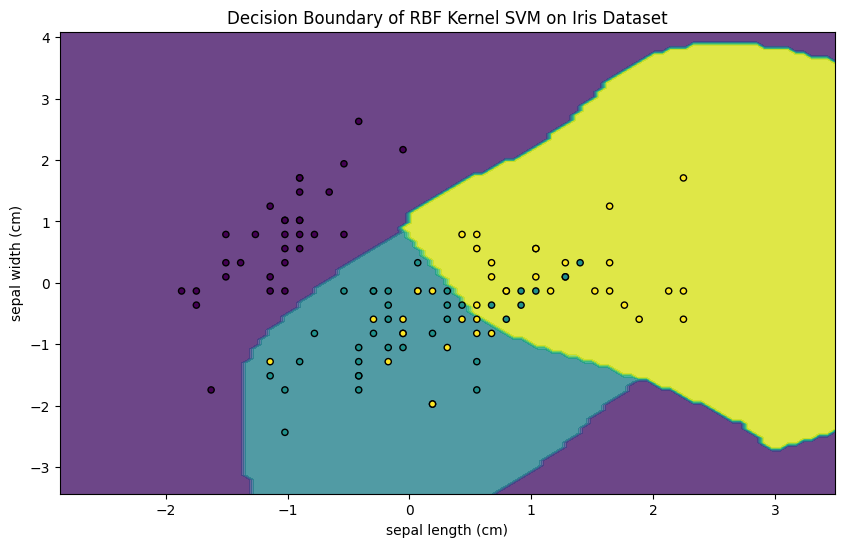

In [13]:
import matplotlib.pyplot as plt

# Accessing feature names
feature_names = iris.feature_names

# For visualization, select the first two features from the dataset
X_vis = X_scaled[:, :2]

# Re-split the dataset with only two features for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Train the optimized SVM model on this two-feature dataset
best_svm_classifier_vis = SVC(**best_params)
best_svm_classifier_vis.fit(X_train_vis, y_train_vis)

# Create a meshgrid for contour plot
feature1, feature2 = X_vis[:, 0], X_vis[:, 1]
xx, yy = np.meshgrid(np.linspace(feature1.min() - 1, feature1.max() + 1, 100),
                     np.linspace(feature2.min() - 1, feature2.max() + 1, 100))

# Predict on the meshgrid
Z = best_svm_classifier_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, s=20, edgecolor='k')
plt.title("Decision Boundary of RBF Kernel SVM on Iris Dataset")
plt.xlabel(feature_names[0])  # Sepal Length (cm)
plt.ylabel(feature_names[1])  # Sepal Width (cm)
plt.show()

# 3.6 ( 5 points)

Calculate and print the precision, recall, and F1-score for each class in the test set using `classification_report`. Provide the code and discuss the results in terms of model performance.

In [14]:
from sklearn.metrics import classification_report

# Redefine and retrain the SVM classifier with the best hyperparameters
# Best hyperparameters from previous tuning
best_params = {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

# Retrain the classifier
best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_svm_classifier.predict(X_test)

# Calculate and print the classification report
report = classification_report(y_test, y_test_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



__Answer__

The optimized RBF kernel SVM classifier, with a `gamma` value set to 'auto' and a regularization parameter `C` of 100, demonstrates exemplary performance across all evaluated metrics. The precision, recall, and F1-score for each of the three classes – Iris Setosa, Iris Versicolor, and Iris Virginica – have reached the ideal value of 1.00. This outcome indicates that the model not only correctly identified all instances of each class (100% precision) but also successfully detected all actual instances present in the test set (100% recall). The F1-score, a harmonized mean of precision and recall, solidifies the model's ability to balance both the accuracy of its predictions and the completeness of its detection capabilities.

Such a high level of performance, culminating in an overall accuracy of 100%, suggests that the model is exceptionally well-tuned for the given dataset. It manages to classify each Iris species without any misclassification, showcasing its robustness and reliability. However, it's important to note that while perfect scores in a controlled test environment are encouraging, they might also hint at a model being overfitted to the specific characteristics of the dataset used. In real-world scenarios, where data can be more varied and complex, the model might not necessarily maintain the same level of accuracy. Therefore, while the results are undoubtedly impressive, they should be interpreted with an understanding of the dataset's simplicity and the potential differences in more complex or diverse datasets.